In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.head(20)

# Combine the data into a single dataset
pyber = pd.merge(ride_data, city_data, on = "city", how = "outer")


# Display the data table for preview
pyber.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
groupby_city = pyber.groupby("city")

pyber_drop = pyber.drop_duplicates("city")
pyber_drop = pyber_drop.set_index("city")

total_rides = groupby_city["ride_id"].count()
avg_fare = groupby_city["fare"].mean()


urban_drop = pyber_drop[pyber_drop["type"]=="Urban"]
suburban_drop = pyber_drop[pyber_drop["type"]=="Suburban"]
rural_drop = pyber_drop[pyber_drop["type"]=="Rural"]

urban = pyber[pyber["type"]=="Urban"]
suburban = pyber[pyber["type"]=="Suburban"]
rural = pyber[pyber["type"]=="Rural"]

urban_groupby = urban.groupby("city")
suburban_groupby = suburban.groupby("city")
rural_groupby = rural.groupby("city")

avg_urban = urban_groupby["fare"].mean()
avg_suburban = suburban_groupby["fare"].mean()
avg_rural= rural_groupby["fare"].mean()

urban_rides = urban_groupby["ride_id"].count()
suburban_rides = suburban_groupby["ride_id"].count()
rural_rides = rural_groupby["ride_id"].count()

urban_driver = urban_drop["driver_count"]
suburban_driver = suburban_drop["driver_count"]
rural_driver = rural_drop["driver_count"]

df_urban = pd.DataFrame({
    "Avg Fare" : avg_urban,
    "Total Rides" : urban_rides,
    "Driver Count" : urban_driver
})
df_suburban = pd.DataFrame({
    "Avg Fare" : avg_suburban,
    "Total Rides" : suburban_rides,
    "Driver Count" : suburban_driver
})
df_rural = pd.DataFrame({
    "Avg Fare" : avg_rural,
    "Total Rides" : rural_rides,
    "Driver Count" : rural_driver
})

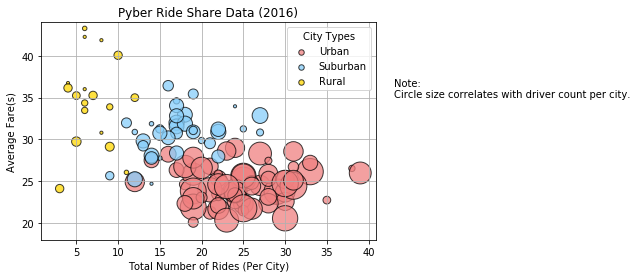

In [3]:
# Build the scatter plots for each city types
plt.scatter(x=df_urban["Total Rides"], y=df_urban["Avg Fare"], label='Urban', facecolor='lightcoral', edgecolor='black', s=df_urban["Driver Count"]*10, alpha=.75)    
plt.scatter(x=df_suburban["Total Rides"], y=df_suburban["Avg Fare"], label='Suburban', color='lightskyblue', edgecolor='black', s=df_suburban["Driver Count"]*10, alpha=.75)    
plt.scatter(x=df_rural["Total Rides"], y=df_rural["Avg Fare"], label='Rural', color='gold', edgecolor='black', s=df_rural["Driver Count"]*10, alpha=.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Share Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare(s)")
plt.ylim(18,44)
plt.grid()

# Create a legend
lgnd = plt.legend(title="City Types", loc="upper right", labels=['Urban','Suburban','Rural'])
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43,35,s="Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/BubblePlotRideShare.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

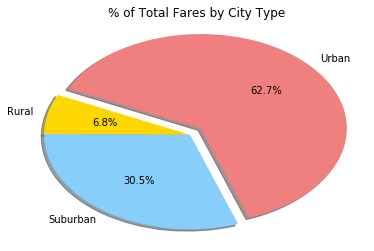

In [5]:
# Calculate Type Percents

groupby_type = pyber.groupby("type")
total_fares = groupby_type["fare"].sum()

# Build Pie Chart
total_fares_labels = ["Rural", "Suburban", "Urban"]
total_fares_colors = ["gold", "lightskyblue", "lightcoral"]
total_fares_explode = [0,0,0.1]
           
plt.pie(x=total_fares, colors=total_fares_colors, labels=total_fares_labels, startangle=155, autopct= '%1.1f%%', explode=total_fares_explode, shadow=True)
plt.title("% of Total Fares by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/PieChartTotalFares.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

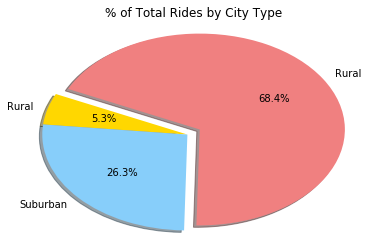

In [7]:
# Calculate Ride Percents
total_ride = groupby_type["ride_id"].count()

# Build Pie Chart
total_rides_labels = ["Rural", "Suburban", "Rural"]
total_rides_colors = ["gold", "lightskyblue", "lightcoral"]
total_rides_explode = [0,0,0.1]

plt.pie(total_ride, labels=total_rides_labels, colors=total_rides_colors, explode=total_rides_explode, startangle=155, autopct='%1.1f%%', shadow=True)
plt.axis('tight')
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/PieChartTotalRides.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

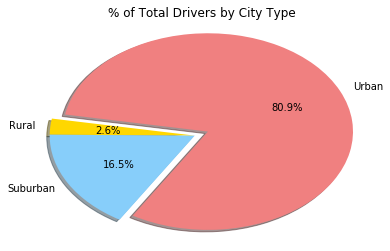

In [9]:
# Calculate Driver Percents

groupby_type_drop = pyber_drop.groupby("type")
total_drivers = groupby_type_drop["driver_count"].sum()

# Build Pie Charts
total_drivers_labels = ["Rural", "Suburban", "Urban"]
total_drivers_colors = ["gold", "lightskyblue", "lightcoral"]
total_drivers_explode = [0, 0, 0.1]

plt.pie(total_drivers, labels=total_drivers_labels, colors=total_fares_colors, explode=total_fares_explode, autopct='%1.1f%%', startangle=170, shadow=True)
plt.axis('tight')
plt.title("% of Total Drivers by City Type")

#Save Figure
plt.savefig("../Images/PieChartTotalDrivers.png")

In [10]:
# Show Figure
plt.show()

Observable Trends:

1. The highest percentage of total fares and total rides are both from Urban cities. Therefore, the majority of Pyber customers and profits come from Urban cities. Pyber should focus their business and advertisement in urban and suburban city types.

2. The average fares are highest in Rural cities and lowest in Urban cities. We can infer that this is due to variation in ride distance/length. On average, the ride time/distance between two points in Rural cities will be much greater compared to rides taken in Urban cities. 

3. We can see that in cities where there are a greater total number of rides, there are also a greated number of drivers. This is an example of supply and demand. There is less demand for Pyber in Rural cities so there are less drivers per Rural city compared to Urban and Suburban cities. In Urban cities, the greater demand for pyber rides the more drivers there needes to be to keep prices from getting too high. Pyber should focus on maintaining a proper number of drivers per city depending on demand for rides to keep prices fare and customers happy. 